In [ ]:
import nltk
import re
import string
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, LancasterStemmer, WordNetLemmatizer
from nltk import FreqDist

# Download required resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab') # Download the punkt_tab resource


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

soccer also known as football in most parts of the world.it is a sport that brings people together like no other. with just a ball and a bit of open space , anyone can join in , making it accessible and loved globally. the excitement of a well-timed goal , the strategy behind each pass , and the teamwork required on the field all contribute to its universal appeal. major tournaments like the fifa world cup unite nations and spark intense national pride. what makes soccer even more special is how it inspires young players to dream big , from dusty fields to packed stadiums. it's more than a game—it's a global language of passion and unity.
soccer also known as football in most parts of the worldit is a sport that brings people together like no other with just a ball and a bit of open space  anyone can join in  making it accessible and loved globally the excitement of a welltimed goal  the strategy behind each pass  and the teamwork required on the field all contribute to its universal a

<Axes: title={'center': 'Top Words'}, xlabel='Samples', ylabel='Counts'>

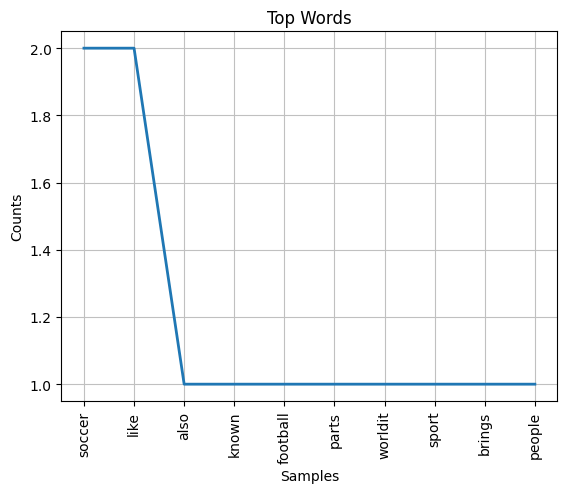

In [ ]:
#Ques 1
import string
text = "Soccer also known as football in most parts of the world.It is a sport that brings people together like no other. With just a ball and a bit of open space , anyone can join in , making it accessible and loved globally. The excitement of a well-timed goal , the strategy behind each pass , and the teamwork required on the field all contribute to its universal appeal. Major tournaments like the FIFA World Cup unite nations and spark intense national pride. What makes soccer even more special is how it inspires young players to dream big , from dusty fields to packed stadiums. It's more than a game—it's a global language of passion and unity."


text_lower = text.lower()
print(text_lower)

text_no_punct = text_lower.translate(str.maketrans('', '', string.punctuation))
print(text_no_punct)


word_tokens = word_tokenize(text_no_punct)
print(word_tokens)


sent_tokens = sent_tokenize(text_no_punct)
print(sent_tokens)

stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in word_tokens if word.lower() not in stop_words]
print(filtered_tokens)

fd = FreqDist(filtered_tokens)
print(fd.most_common(10))
fd.plot(10, title = "Top Words", cumulative=False)

In [ ]:
#Ques 2

import pandas as pd

print(filtered_tokens)

ps = PorterStemmer()
ln = LancasterStemmer()
lm = WordNetLemmatizer()
data = []
for word in filtered_tokens:
  porter_stem = ps.stem(word)
  lancaster_stem = ln.stem(word)
  lemma = lm.lemmatize(word)
  data.append([word, porter_stem, lancaster_stem, lemma])

df = pd.DataFrame(data, columns=["Word", "PorterStemmed Word", "LancasterStemmed Word", "Lemmatizer Word"])
display(df)

['soccer', 'also', 'known', 'football', 'parts', 'worldit', 'sport', 'brings', 'people', 'together', 'like', 'ball', 'bit', 'open', 'space', 'anyone', 'join', 'making', 'accessible', 'loved', 'globally', 'excitement', 'welltimed', 'goal', 'strategy', 'behind', 'pass', 'teamwork', 'required', 'field', 'contribute', 'universal', 'appeal', 'major', 'tournaments', 'like', 'fifa', 'world', 'cup', 'unite', 'nations', 'spark', 'intense', 'national', 'pride', 'makes', 'soccer', 'even', 'special', 'inspires', 'young', 'players', 'dream', 'big', 'dusty', 'fields', 'packed', 'stadiums', 'game—its', 'global', 'language', 'passion', 'unity']


,Word,PorterStemmed Word,LancasterStemmed Word,Lemmatizer Word
0,soccer,soccer,socc,soccer
1,also,also,also,also
2,known,known,known,known
3,football,footbal,footbal,football
4,parts,part,part,part
...,...,...,...,...
58,game—its,game—it,game—its,game—its
59,global,global,glob,global
60,language,languag,langu,language
61,passion,passion,pass,passion


In [ ]:
#Ques 3.1,3.2

import re
#1
text = "Soccer, also known as football in most parts of the world, is a sport that brings people together like no other. With just a ball and a bit of open space, anyone can join in, making it accessible and loved globally. The excitement of a well-timed goal, the strategy behind each pass, and the teamwork required on the field all contribute to its universal appeal. Major tournaments like the FIFA World Cup unite nations and spark intense national pride. What makes soccer even more special is how it inspires young players to dream big, from dusty fields to packed stadiums. It’s more than a game—it’s a global language of passion and unity."
#2
long_words = re.findall(r'\b\w{6,}\b', text)
print("Words with more than 5 letters:", long_words)
#3
numbers = re.findall(r'\d+', text)
print("Numbers:", numbers)


capitalized_words = re.findall(r'\b[A-Z]\w*\b', text)
print("Capitalized words:", capitalized_words)


Words with more than 5 letters: ['Soccer', 'football', 'brings', 'people', 'together', 'anyone', 'making', 'accessible', 'globally', 'excitement', 'strategy', 'behind', 'teamwork', 'required', 'contribute', 'universal', 'appeal', 'tournaments', 'nations', 'intense', 'national', 'soccer', 'special', 'inspires', 'players', 'fields', 'packed', 'stadiums', 'global', 'language', 'passion']
Numbers: []
Capitalized words: ['Soccer', 'With', 'The', 'Major', 'FIFA', 'World', 'Cup', 'What', 'It']


In [ ]:
# Q3.3
import re

# Sample paragraph
text = """Technology has revolutionized the way we communicate, work, and live.
From smartphones to artificial intelligence, it is transforming industries and our daily lives."""

# a. Split the text into words containing only alphabets
# Remove digits and special characters, keep only alphabetic words
alpha_words = re.findall(r'\b[a-zA-Z]+\b', text)
print("Words with only alphabets:")
print(alpha_words)

# b. Extract words starting with a vowel
vowel_words = [word for word in alpha_words if word[0].lower() in 'aeiou']
print("\nWords starting with a vowel:")
print(vowel_words)


Words with only alphabets:
['Technology', 'has', 'revolutionized', 'the', 'way', 'we', 'communicate', 'work', 'and', 'live', 'From', 'smartphones', 'to', 'artificial', 'intelligence', 'it', 'is', 'transforming', 'industries', 'and', 'our', 'daily', 'lives']

Words starting with a vowel:
['and', 'artificial', 'intelligence', 'it', 'is', 'industries', 'and', 'our']


In [ ]:
#Ques 4

#1,2
def custom_tokenizer(text):
  pattern = r"\b\w+(?:-\w+)+\b|\b\w+'[a-z]+\b|\b\d+\.\d+\b|\b\d+\b|\b[a-zA-Z]+\b"
  tokens=re.findall(pattern,text)
  return tokens

print(custom_tokenizer(text))
print(custom_tokenizer("State-of-the-art AI isn't easy to build. 3.14 is Pi."))



#3
sample = "My email is example@email.com, you can visit my website at https://www.example.com or call me at 123-456-7890 or +91 9876543210."

sample=re.sub(r'\S+@\S+','',sample)
sample = re.sub(r'(?:\+91[\s\-]?)?\d{10}|\d{3}-\d{3}-\d{4}', '', sample)

sample=re.sub(r'https?://[^\s]+', '', sample)

print(sample)


['Technology', 'has', 'revolutionized', 'the', 'way', 'we', 'communicate', 'work', 'and', 'live', 'From', 'smartphones', 'to', 'artificial', 'intelligence', 'it', 'is', 'transforming', 'industries', 'and', 'our', 'daily', 'lives']
['State-of-the-art', 'AI', "isn't", 'easy', 'to', 'build', '3.14', 'is', 'Pi']
My email is  you can visit my website at  or call me at  or .
